In [86]:
import imageio
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import time
from IPython.display import HTML
import os

sns.set_style('white')
# filters to apply to the data
county = 'Kings'
hoods  = ['Downtown', 'DUMBO', 'Fort Greene', 'Boerum Hill', 'Clinton Hill']

def get_neighborhoods(file, county=county, neighborhoods=hoods):
    '''
    reads in geopandas file from Zillow, returns geodataframe with specified neighborhoods
    '''
    # read in the geodata file ('file') and consolidate to the 5 selected neighborhoods (listed above)
    #####your code here#####
    ny_gdf = gpd.GeoDataFrame.from_file(file)
    ny_gdf=ny_gdf[ny_gdf['County']==county]
    ny_gdf=ny_gdf[ny_gdf['Name'].isin(neighborhoods)]
    
    # locate coordinate points to plot neighborhood names
    ny_gdf['coords'] = ny_gdf['geometry'].apply(lambda x: x.representative_point().coords[:])
    ny_gdf['coords'] = [coords[0] for coords in ny_gdf['coords']]
    return ny_gdf

bk_neighborhoods = get_neighborhoods('ZillowNeighborhoodsNY.shp')
bk_neighborhoods = bk_neighborhoods.sort_values('Name').reset_index(drop=True)
bk_neighborhoods

,State,County,City,Name,RegionID,geometry,coords
0,NY,Kings,New York,Boerum Hill,272994,POLYGON ((-73.98682489707035 40.68846655576456...,"(-73.9864896425407, 40.68600290969882)"
1,NY,Kings,New York,Clinton Hill,270815,"POLYGON ((-73.9619257224787 40.69778778197278,...","(-73.96455445229091, 40.689058350724)"
2,NY,Kings,New York,DUMBO,270841,POLYGON ((-73.98446723099994 40.70646091900005...,"(-73.99003960915954, 40.703545669500045)"
3,NY,Kings,New York,Downtown,270825,POLYGON ((-73.98697203810939 40.70105040762233...,"(-73.98678098579373, 40.693458468711725)"
4,NY,Kings,New York,Fort Greene,273766,POLYGON ((-73.98230754099966 40.70227250100029...,"(-73.97573066517539, 40.69136863239475)"


In [87]:
ny_gdf = gpd.GeoDataFrame.from_file('ZillowNeighborhoodsNY.shp')

In [88]:
ny_gdf.head()

,State,County,City,Name,RegionID,geometry
0,NY,Suffolk,Town of Islip,Bohemia,3736,POLYGON ((-73.14422599999978 40.78667100000015...
1,NY,Albany,Town of Coeymans,Ravena,6687,POLYGON ((-73.82263299999994 42.50202800000005...
2,NY,Queens,New York,Rego Park,6719,POLYGON ((-73.85629999999999 40.72303000000012...
3,NY,Suffolk,Town of Islip,Saltaire,6912,POLYGON ((-73.18890699999992 40.63929400000006...
4,NY,Albany,Guilderland,Westmere,9545,POLYGON ((-73.87197712899996 42.69915614600006...


In [89]:
ny_gdf1=ny_gdf[ny_gdf['City']=='New York']
ny_gdf1.head()

,State,County,City,Name,RegionID,geometry
2,NY,Queens,New York,Rego Park,6719,POLYGON ((-73.85629999999999 40.72303000000012...
5,NY,Queens,New York,Belle Harbor,10329,POLYGON ((-73.85618223699993 40.56810940300005...
10,NY,New York,New York,Roosevelt Island,20239,POLYGON ((-73.96143117599991 40.74851331600007...
13,NY,Queens,New York,Howard Beach,21970,POLYGON ((-73.85608525799972 40.65037135900031...
16,NY,Queens,New York,Breezy Point,37557,POLYGON ((-73.90962826099991 40.56552556300005...


In [90]:
ny_gdf2=ny_gdf1[ny_gdf1['County']=='New York']

In [91]:
ny_gdf2.head(10)

,State,County,City,Name,RegionID,geometry
10,NY,New York,New York,Roosevelt Island,20239,POLYGON ((-73.96143117599991 40.74851331600007...
54,NY,New York,New York,Ellis Island,35472,"POLYGON ((-74.0381999999999 40.69921800000009,..."
180,NY,New York,New York,Washington Heights,198687,POLYGON ((-73.92192594599993 40.85516011100009...
191,NY,New York,New York,Chinatown,193821,POLYGON ((-73.99300676872572 40.71433187712174...
196,NY,New York,New York,Greenwich Village,195133,POLYGON ((-73.98733999497614 40.73372011284643...
204,NY,New York,New York,Inwood,195576,POLYGON ((-73.92550434099991 40.87713683500004...
208,NY,New York,New York,Harlem,195267,POLYGON ((-73.93371300799993 40.82756209900003...
242,NY,New York,New York,Hamilton Heights,270850,POLYGON ((-73.94146109799993 40.83092571400005...
246,NY,New York,New York,Marble Hill,270880,POLYGON ((-73.91071526499991 40.87890143900006...
260,NY,New York,New York,Carnegie Hill,270810,POLYGON ((-73.95108076152889 40.78595674158064...


In [92]:
hoods  = ['Downtown', 'DUMBO', 'Fort Greene', 'Boerum Hill', 'Clinton Hill']

In [93]:
ny_gdf2['coords'] = ny_gdf2['geometry'].apply(lambda x: x.representative_point().coords[:])
ny_gdf2['coords'] = [coords[0] for coords in ny_gdf2['coords']]

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [94]:
ny_gdf2

,State,County,City,Name,RegionID,geometry,coords
10,NY,New York,New York,Roosevelt Island,20239,POLYGON ((-73.96143117599991 40.74851331600007...,"(-73.9504153047999, 40.761082486500044)"
54,NY,New York,New York,Ellis Island,35472,"POLYGON ((-74.0381999999999 40.69921800000009,...","(-74.03948178178828, 40.69978700000007)"
180,NY,New York,New York,Washington Heights,198687,POLYGON ((-73.92192594599993 40.85516011100009...,"(-73.93748432140897, 40.84747343700005)"
191,NY,New York,New York,Chinatown,193821,POLYGON ((-73.99300676872572 40.71433187712174...,"(-73.99752400643692, 40.71633571454155)"
196,NY,New York,New York,Greenwich Village,195133,POLYGON ((-73.98733999497614 40.73372011284643...,"(-73.99602920767298, 40.73232005642328)"
204,NY,New York,New York,Inwood,195576,POLYGON ((-73.92550434099991 40.87713683500004...,"(-73.92066962692707, 40.86659382750008)"
208,NY,New York,New York,Harlem,195267,POLYGON ((-73.93371300799993 40.82756209900003...,"(-73.94261981360168, 40.815009715500054)"
242,NY,New York,New York,Hamilton Heights,270850,POLYGON ((-73.94146109799993 40.83092571400005...,"(-73.95180060767643, 40.82520562150006)"
246,NY,New York,New York,Marble Hill,270880,POLYGON ((-73.91071526499991 40.87890143900006...,"(-73.91130322249285, 40.875290063500046)"
260,NY,New York,New York,Carnegie Hill,270810,POLYGON ((-73.95108076152889 40.78595674158064...,"(-73.95610842745172, 40.783434877135235)"


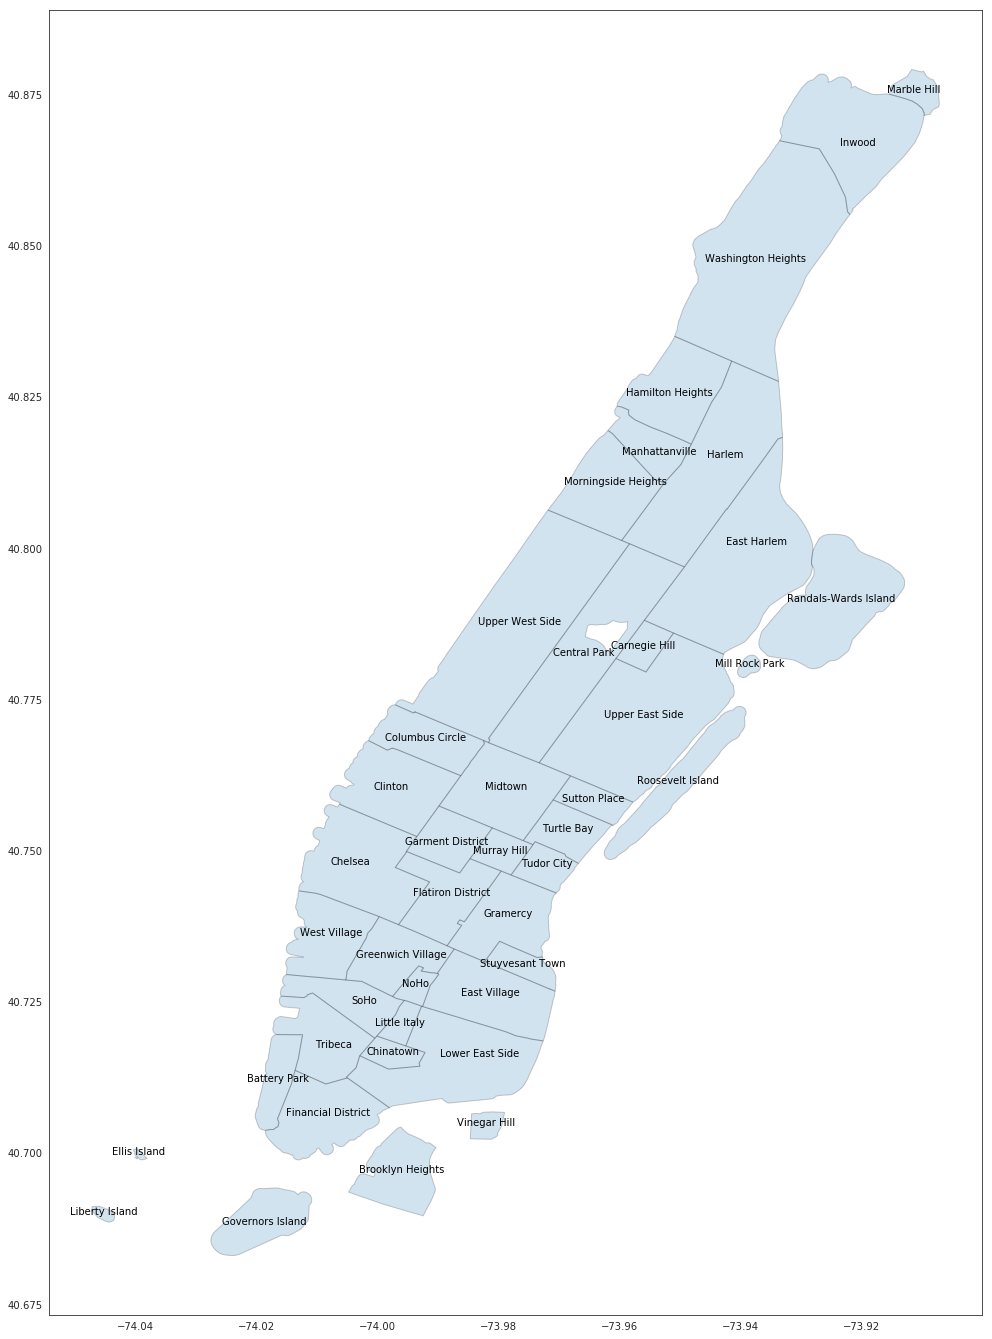

In [95]:
ny_gdf2.plot(figsize=(30, 24), edgecolor='black', alpha=0.2)

for idx, row in ny_gdf2.iterrows():
    plt.annotate(s=row['Name'], xy=row['coords'], color='Black', horizontalalignment='center', size=10)

In [96]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import seaborn as sns
%pylab inline

if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2016")

import os

Populating the interactive namespace from numpy and matplotlib
Must set env variable PUI2016
Must set env variable PUI2016


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [97]:
monthly = pd.read_csv('CitiBike_monthly_byStation.csv')

In [98]:
station_id = pd.read_csv('Station_id.csv',index_col=0)
station_id.index=station_id.index.astype(str)
station_id.head()

,lat,lon
1000,40.753231,-73.970325
1001,40.749718,-74.002950
1002,40.730287,-73.990765
1003,40.718939,-73.992663
1004,40.734927,-73.992005


In [99]:
import shapely
station_id['lonlat']=list(zip(station_id.lon,station_id.lat))
station_id['geometry']=station_id[['lonlat']].applymap(lambda x:shapely.geometry.Point(x))
station_id.head()

,lat,lon,lonlat,geometry
1000,40.753231,-73.970325,"(-73.97032517, 40.75323098)",POINT (-73.97032517 40.75323098)
1001,40.749718,-74.002950,"(-74.002950346, 40.749717753)",POINT (-74.00295034600001 40.749717753)
1002,40.730287,-73.990765,"(-73.9907647, 40.73028666)",POINT (-73.9907647 40.73028666)
1003,40.718939,-73.992663,"(-73.99266288, 40.71893904)",POINT (-73.99266288 40.71893904)
1004,40.734927,-73.992005,"(-73.99200509, 40.73492695)",POINT (-73.99200509000001 40.73492695)


In [100]:
from geopandas.tools import sjoin
from fiona.crs import from_epsg

In [101]:
station_id = gpd.GeoDataFrame(station_id)
ny_gdf2=gpd.GeoDataFrame(ny_gdf2)

In [102]:
station_id.crs = from_epsg(4326)
station_ft = station_id.to_crs(epsg=2263)
ny_gdf2.crs = from_epsg(4326)
ny_gdf2_ft=ny_gdf2.to_crs(epsg=2263)

In [103]:
station_ft = station_ft.join(pd.Series(monthly.sum(), name="MonthlyAct"))

In [104]:
station_ft.head()

,lat,lon,lonlat,geometry,MonthlyAct
1000,40.753231,-73.970325,"(-73.97032517, 40.75323098)",POINT (992471.6913760398 213700.4296134594),69308
1001,40.749718,-74.002950,"(-74.002950346, 40.749717753)",POINT (983432.5357034664 212419.0687267594),102824
1002,40.730287,-73.990765,"(-73.9907647, 40.73028666)",POINT (986809.6082826314 205339.8267585847),273525
1003,40.718939,-73.992663,"(-73.99266288, 40.71893904)",POINT (986283.864757934 201205.4881310944),101949
1004,40.734927,-73.992005,"(-73.99200509, 40.73492695)",POINT (986465.6738667039 207030.395932173),184044


In [109]:
monthlyact=sjoin(ny_gdf2_ft,station_ft)

In [113]:
monthlyact=monthlyact.to_crs(epsg=2263)

In [121]:
monthlyact.head()

,State,County,City,Name,RegionID,geometry,coords,index_right,lat,lon,lonlat,MonthlyAct
191,NY,New York,New York,Chinatown,193821,"POLYGON ((986188.6720995799 199526.9502357467,...","(-73.99752400643692, 40.71633571454155)",1108,40.715816,-73.994224,"(-73.99422366, 40.715815500000005)",68995
191,NY,New York,New York,Chinatown,193821,"POLYGON ((986188.6720995799 199526.9502357467,...","(-73.99752400643692, 40.71633571454155)",1195,40.716021,-73.999744,"(-73.99974372, 40.71602118)",79095
191,NY,New York,New York,Chinatown,193821,"POLYGON ((986188.6720995799 199526.9502357467,...","(-73.99752400643692, 40.71633571454155)",1225,40.717290,-73.996375,"(-73.996375, 40.717290000000006)",94390
191,NY,New York,New York,Chinatown,193821,"POLYGON ((986188.6720995799 199526.9502357467,...","(-73.99752400643692, 40.71633571454155)",1072,40.719105,-73.999733,"(-73.99973337, 40.71910537)",88666
191,NY,New York,New York,Chinatown,193821,"POLYGON ((986188.6720995799 199526.9502357467,...","(-73.99752400643692, 40.71633571454155)",1180,40.714131,-73.997047,"(-73.99704679999999, 40.71413089)",64081


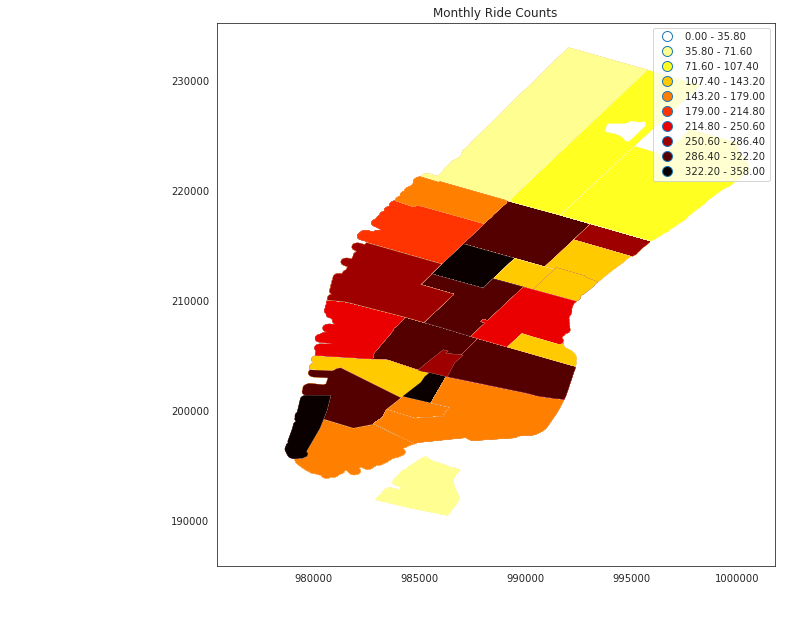

In [123]:
f, ax = plt.subplots(figsize=(10,10))
monthlyact.plot(column='MonthlyAct',cmap='hot_r',alpha=1,linewidth=0.1,ax=ax,scheme="quantiles", legend=True, k=10)
for idx, row in monthlyact.iterrows():
    plt.annotate(s=row['Name'], xy=row['coords'], color='Black', horizontalalignment='center', size=10)
plt.title("Monthly Ride Counts");